In [17]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Create a Spark session
spark = SparkSession.builder.appName("NaiveBayesExample").getOrCreate()

# Load the Iris dataset from the UCI Machine Learning Repository
data = spark.read.csv("Iris.csv", header=True, inferSchema=True)

# Index the target column
indexer = StringIndexer(inputCol="Species", outputCol="species_index")
indexed_data = indexer.fit(data).transform(data)

# Assemble feature vectors
assembler = VectorAssembler(inputCols=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"], outputCol="features")
assembled_data = assembler.transform(indexed_data)

# Split the data into training and testing sets
train_data, test_data = assembled_data.randomSplit([0.8, 0.2], seed=123)

# Create a Naive Bayes model
nb = NaiveBayes(featuresCol="features", labelCol="species_index")

# Train the model
nb_model = nb.fit(train_data)

# Make predictions on the test data
predictions = nb_model.transform(test_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="species_index", predictionCol="prediction", metricName="accuracy")
accuracy1 = evaluator.evaluate(predictions)
print("Accuracy:", accuracy1)

# Stop the Spark session
spark.stop()


/home/admin123/Downloads/spark-3.4.1-bin-hadoop3/python/pyspark/context.py:317: FutureWarning: Python 3.7 support is deprecated in Spark 3.4.
  warnings.warn("Python 3.7 support is deprecated in Spark 3.4.", FutureWarning)


Accuracy: 0.9655172413793104


In [18]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Create a Spark session
spark = SparkSession.builder.appName("DecisionTreeExample").getOrCreate()

# Load the Iris dataset from the UCI Machine Learning Repository
data = spark.read.csv("Iris.csv", header=True, inferSchema=True)

# Index the target column
indexer = StringIndexer(inputCol="Species", outputCol="species_index")
indexed_data = indexer.fit(data).transform(data)

# Assemble feature vectors
assembler = VectorAssembler(inputCols=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"], outputCol="features")
assembled_data = assembler.transform(indexed_data)

# Split the data into training and testing sets
train_data, test_data = assembled_data.randomSplit([0.8, 0.2], seed=123)

# Create a Decision Tree classifier
dt = DecisionTreeClassifier(featuresCol="features", labelCol="species_index")

# Train the model
dt_model = dt.fit(train_data)

# Make predictions on the test data
predictions = dt_model.transform(test_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="species_index", predictionCol="prediction", metricName="accuracy")
accuracy2 = evaluator.evaluate(predictions)
print("Accuracy:", accuracy2)

# Stop the Spark session
spark.stop()


/home/admin123/Downloads/spark-3.4.1-bin-hadoop3/python/pyspark/context.py:317: FutureWarning: Python 3.7 support is deprecated in Spark 3.4.
  warnings.warn("Python 3.7 support is deprecated in Spark 3.4.", FutureWarning)


Accuracy: 0.9310344827586207


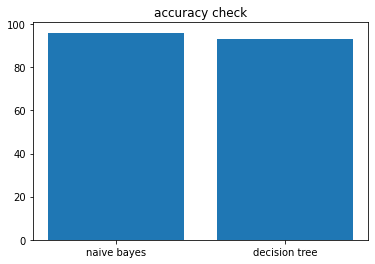

In [21]:
import matplotlib.pyplot as plt

# Sample data
categories = ['naive bayes', 'decision tree']
values = [96, 93]

# Create a bar plot
plt.bar(categories, values)


plt.title("accuracy check")
# Display the plot
plt.show()

